In [2]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import *

import helpers

In [ ]:
sns.set_style("white")
sns.set(rc={
    'figure.figsize': (13,13),
    'axes.facecolor': 'darkgrey',
    'figure.facecolor': 'white',
    'axes.grid': False
})

In [5]:
# Playlist 1
p1_name, p1_tracks = helpers.collect_tracks_query("old school reggae roots", "playlist")
df1 = helpers.get_tracklist_features(p1_tracks)
print(f"Playlist analysis: {p1_name}, with {len(p1_tracks)} tracks")

# Playlist 1
p2_name, p2_tracks = helpers.collect_tracks_query("heavy dub roots reggae", "playlist")
df2 = helpers.get_tracklist_features(p2_tracks)
print(f"Playlist analysis: {p2_name}, with {len(p2_tracks)} tracks")

# Playlist 1
p3_name, p3_tracks = helpers.collect_tracks_query("deep medi musik", "playlist")
df3 = helpers.get_tracklist_features(p3_tracks)
print(f"Playlist analysis: {p3_name}, with {len(p3_tracks)} tracks")

df1["playlist"] = "reggae"
df2["playlist"] = "dub"
df3["playlist"] = "dubstep"
complete_df = pd.concat([df1, df2, df3])

distance_features = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence"
]

Playlist analysis: Old School Reggae Roots 70s/80s, with 372 tracks
Playlist analysis: Heavy Dub Roots Reggae, with 835 tracks
Playlist analysis: DEEP MEDi MUSIK & Tempa Records .. deep, with 617 tracks


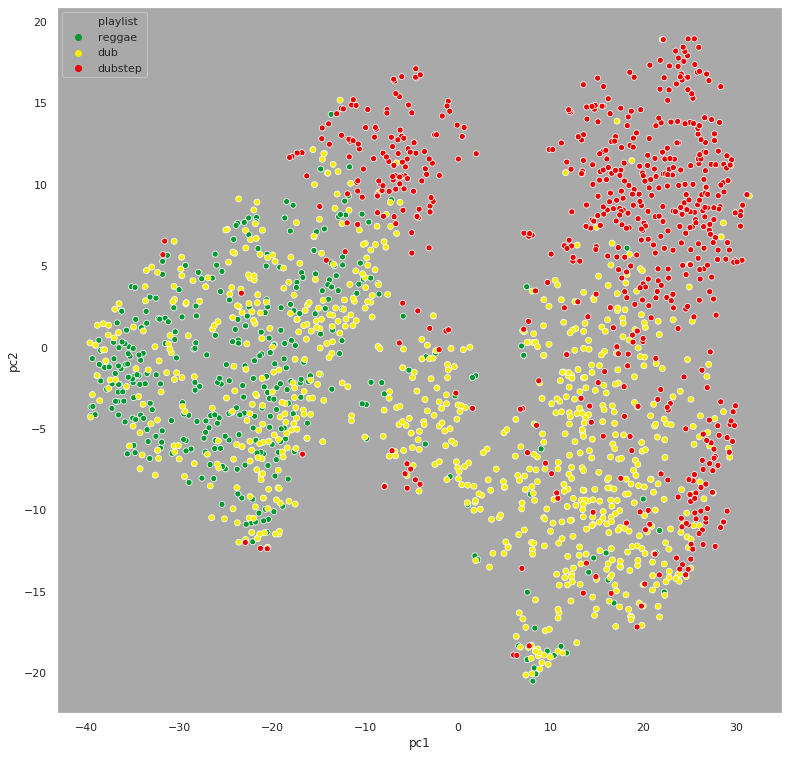

In [6]:
tsne = TSNE(n_components=2, perplexity=80)
components = tsne.fit_transform(complete_df[distance_features].values)

complete_df["c1"] = components[:, 0]
complete_df["c2"] = components[:, 1]

sns.scatterplot(data=complete_df, x="c1", y="c2", hue="playlist", 
                palette = ["#00992f", "#f7ee00", "#eb0000"])

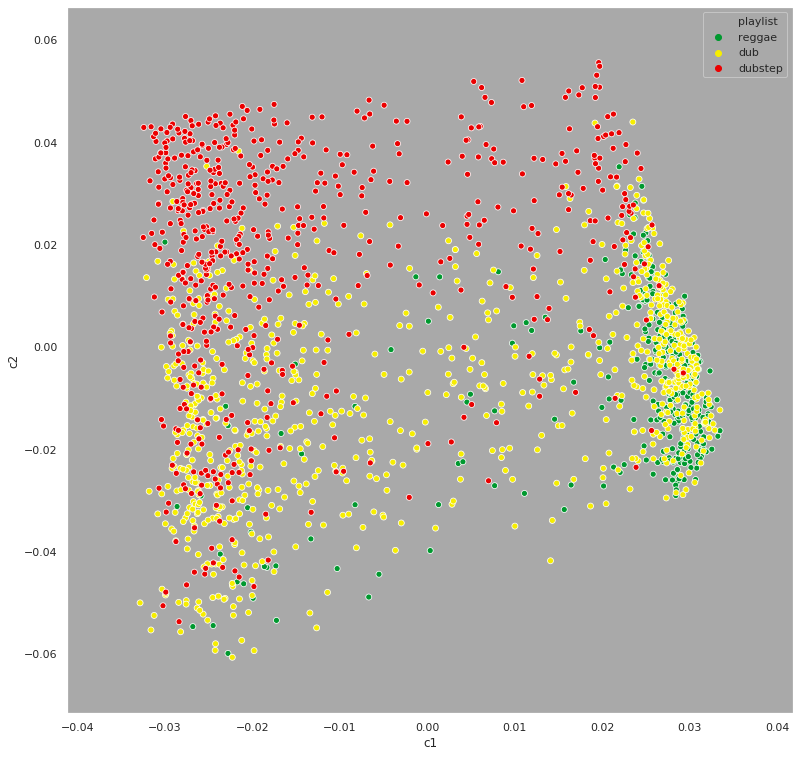

In [10]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=50)
components = lle.fit_transform(complete_df[distance_features].values)

complete_df["c1"] = components[:, 0]
complete_df["c2"] = components[:, 1]

sns.scatterplot(data=complete_df, x="c1", y="c2", hue="playlist", 
                palette = ["#00992f", "#f7ee00", "#eb0000"])

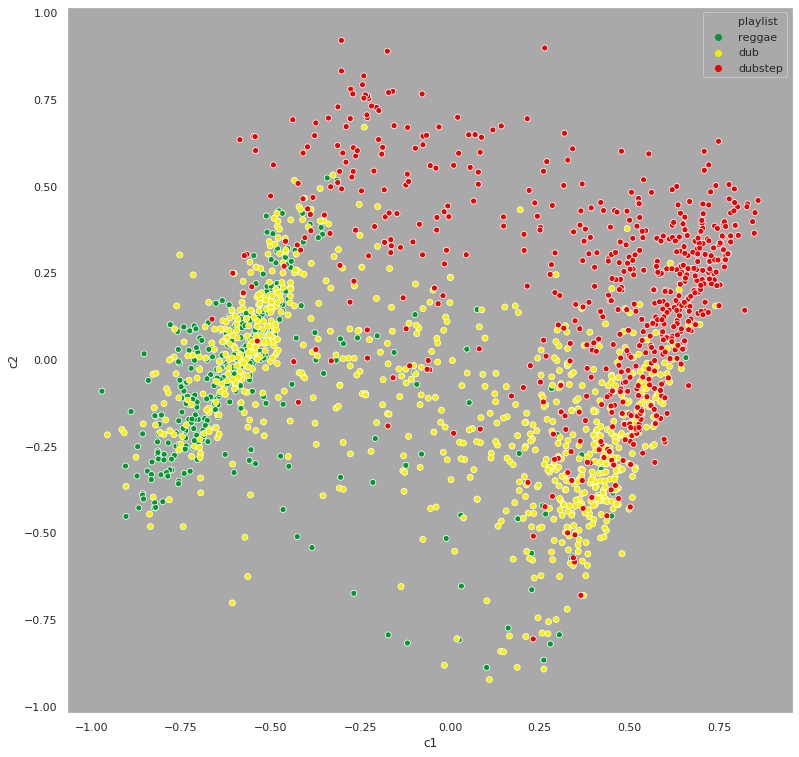

In [11]:
isomap = Isomap(n_components=2, n_neighbors=50)
components = isomap.fit_transform(complete_df[distance_features].values)

complete_df["c1"] = components[:, 0]
complete_df["c2"] = components[:, 1]

sns.scatterplot(data=complete_df, x="c1", y="c2", hue="playlist", 
                palette = ["#00992f", "#f7ee00", "#eb0000"])

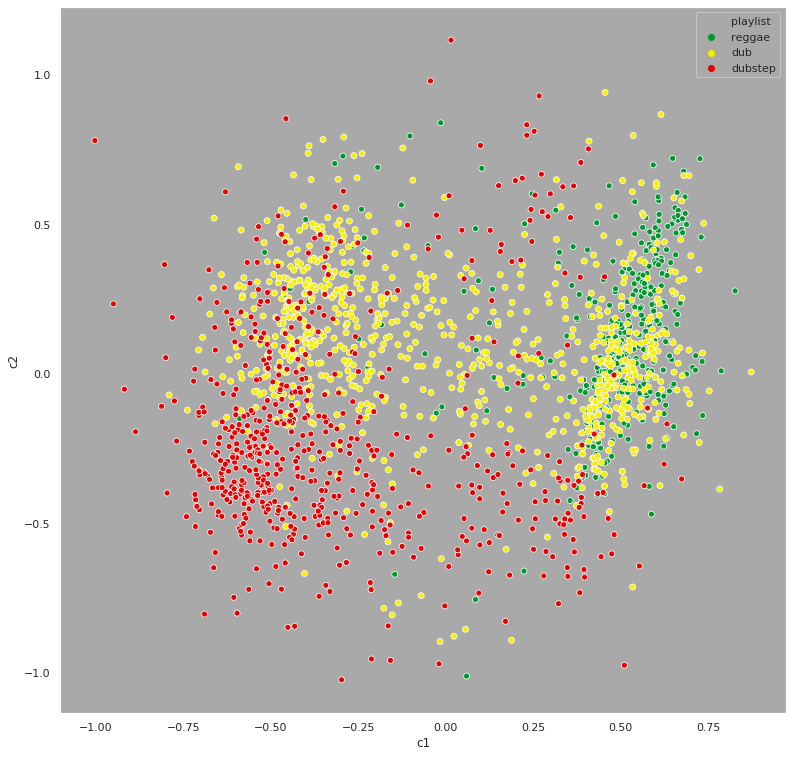

In [13]:
mds = MDS(n_components=2)
components = mds.fit_transform(complete_df[distance_features].values)

complete_df["c1"] = components[:, 0]
complete_df["c2"] = components[:, 1]

sns.scatterplot(data=complete_df, x="c1", y="c2", hue="playlist", 
                palette = ["#00992f", "#f7ee00", "#eb0000"])

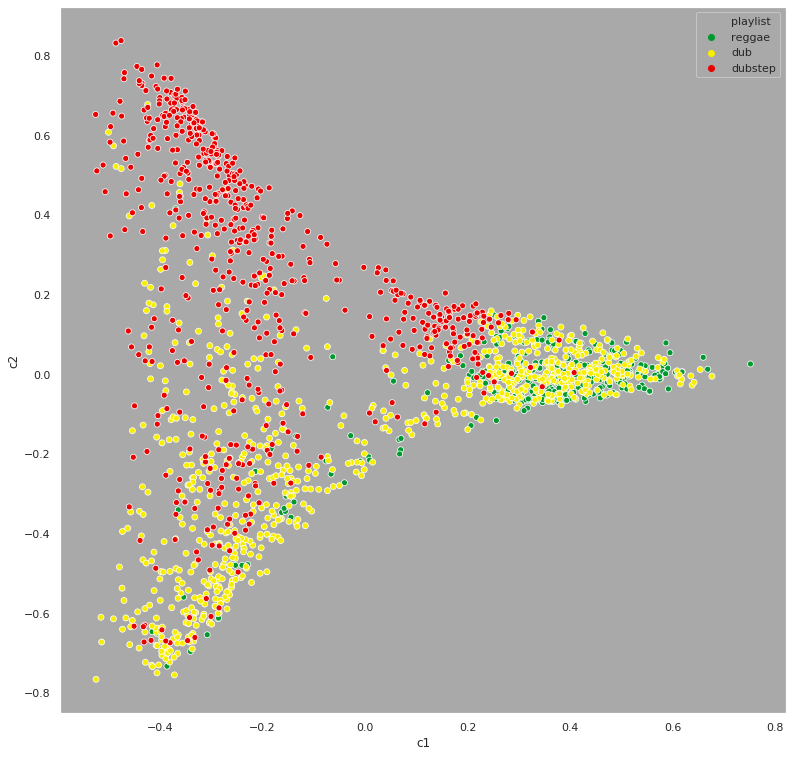

In [14]:
se = SpectralEmbedding(n_components=2)
components = se.fit_transform(complete_df[distance_features].values)

complete_df["c1"] = components[:, 0]
complete_df["c2"] = components[:, 1]

sns.scatterplot(data=complete_df, x="c1", y="c2", hue="playlist", 
                palette = ["#00992f", "#f7ee00", "#eb0000"])